<a href="https://colab.research.google.com/github/pranavvb03/breast-cancer-detection-ML/blob/main/Project_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Cancer Detection

# Breast Cancer Wisconsin (Disgnostic) Data Set

[Source: UCI](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

[Data Set info](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
col = ['id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv("breast-cancer-wisconsin.data.csv", names=col,
                 header=None)
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Pre-processing

In [ ]:
np.where(df.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [ ]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

Dropping null/missing values

In [ ]:
df[df['Bare Nuclei'] == "?"]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [ ]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [ ]:
df['Bare Nuclei'].replace("?", np.NAN, inplace=True)
df = df.dropna()

Note that for class: 2 is benign, 4 is for malignant

$$\frac{\text{df["Class"]}}{2} - 1$$

In [ ]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
df['Class'] = df['Class'] / 2 - 1

In [ ]:
df['Class'].value_counts()

0.0    444
1.0    239
Name: Class, dtype: int64

In [ ]:
df.columns

Index(['id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           683 non-null    int64  
 1   Clump Thickness              683 non-null    int64  
 2   Uniformity of Cell Size      683 non-null    int64  
 3   Uniformity of Cell Shape     683 non-null    int64  
 4   Marginal Adhesion            683 non-null    int64  
 5   Single Epithelial Cell Size  683 non-null    int64  
 6   Bare Nuclei                  683 non-null    object 
 7   Bland Chromatin              683 non-null    int64  
 8   Normal Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 64.0+ KB


In [ ]:
df.describe()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [ ]:
X = df.drop(['id', 'Class'], axis=1)
X_col = X.columns

In [ ]:
y = df['Class']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler().fit_transform(X.values)

In [ ]:
cor = df.corr()
cor

<ipython-input-78-150a9db5d4b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.618128,0.628926,0.480583,0.690958
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.346011,0.433757,1.000000,0.423448
Class,-0.084701,0.714790,0.820801,0.821891,0.706294,0.690958,0.758228,0.718677,0.423448,1.000000


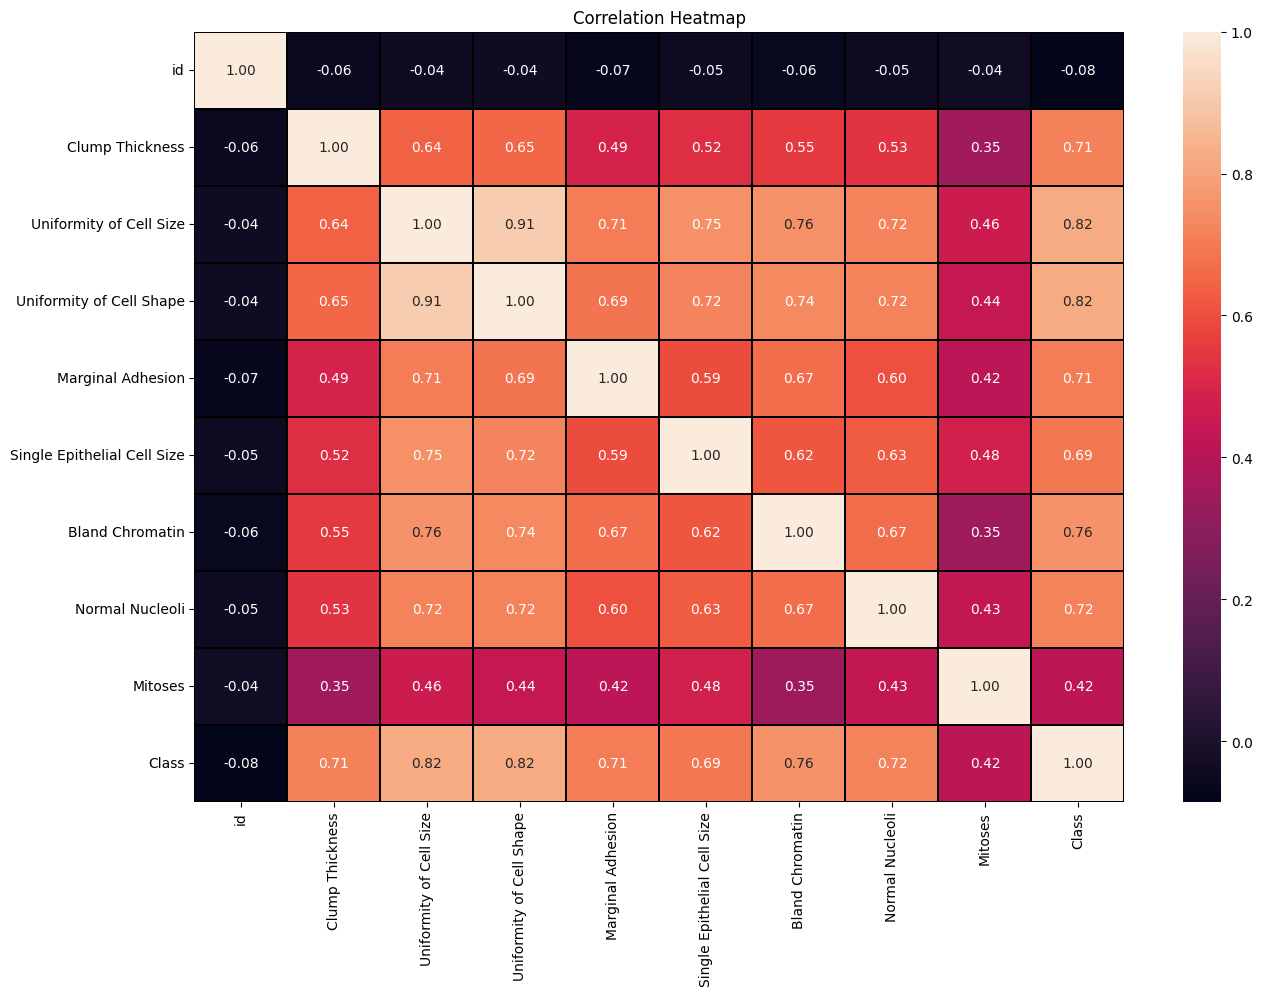

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot= True, linewidths= 0.3 ,linecolor = "black", fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

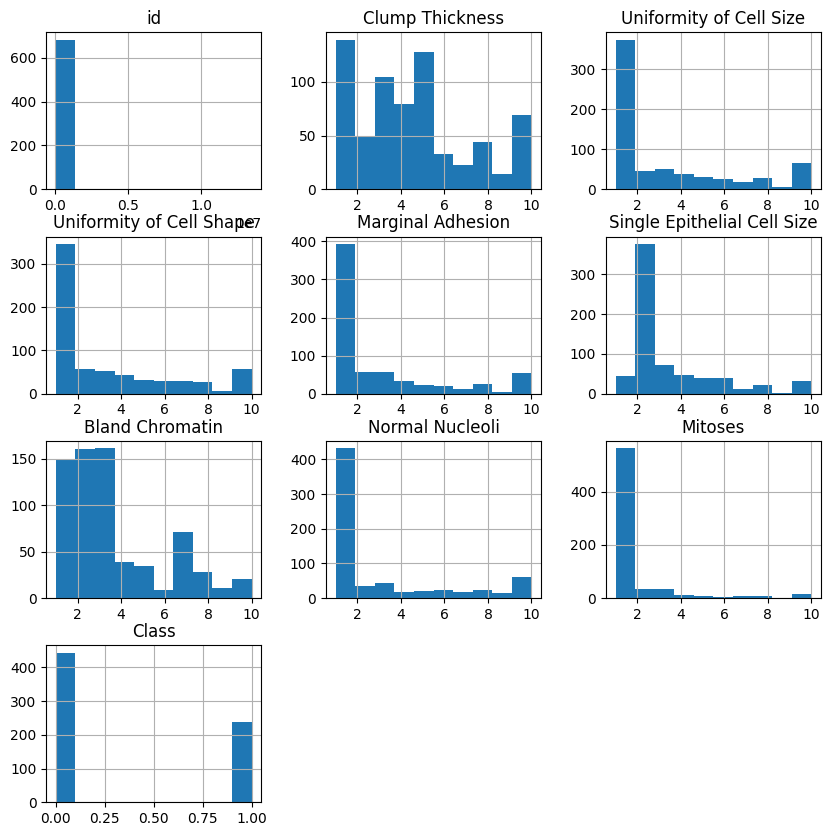

In [ ]:
df.hist(figsize = (10,10))
plt.show()

Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df1 = pd.DataFrame(X, columns=X_col)

In [ ]:
df1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['id', 'Class'], axis=1).values), columns=X_col).head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,
                           p=2, metric='minkowski')

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train==False:
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [ ]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9744

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.97      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix: 
 [[357   8]
 [  6 175]]

Average Accuracy: 	 0.9615
Accuracy SD: 		 0.0128


In [ ]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9635

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        79
         1.0       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix: 
 [[78  1]
 [ 4 54]]



# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [ ]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params,
                              n_jobs=-1,
                              verbose=1)

In [ ]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [ ]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9707

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.95      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix: 
 [[358   7]
 [  9 172]]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds

In [ ]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9489

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix: 
 [[78  1]
 [ 6 52]]



In [ ]:
grid_search_cv.best_params_

{'n_neighbors': 8}

In [ ]:
print(grid_search_cv.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [ ]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00413976, 0.00400529, 0.00399961, 0.00449243, 0.00404296,
        0.00386987, 0.00407095, 0.00527515, 0.00498037, 0.00398803]),
 'std_fit_time': array([0.00049941, 0.00012461, 0.00021987, 0.00091962, 0.00016791,
        0.0001654 , 0.00014132, 0.00284739, 0.00188649, 0.00018944]),
 'mean_score_time': array([0.01350846, 0.01569529, 0.01553721, 0.01574788, 0.01535182,
        0.01489983, 0.0152739 , 0.01685624, 0.01725712, 0.01397758]),
 'std_score_time': array([0.00089781, 0.0009658 , 0.00082988, 0.0023918 , 0.00118428,
        0.000312  , 0.00072391, 0.00351915, 0.00270861, 0.00233896]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


SVM, Random Forest, XGBoost

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9799

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       365
         1.0       0.96      0.98      0.97       181

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546


Confusion Matrix: 
 [[358   7]
 [  4 177]]

Average Accuracy: 	 0.9634
Accuracy SD: 		 0.0244
Test Result:

accuracy score: 0.9635

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        79
         1.0       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix: 
 [[77  2]
 [ 3 55]]



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       181

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546


Confusion Matrix: 
 [[365   0]
 [  0 181]]

Average Accuracy: 	 0.9652
Accuracy SD: 		 0.0223
Test Result:

accuracy score: 0.9489

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix: 
 [[78  1]
 [ 6 52]]



In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       365
         1.0       1.00      1.00      1.00       181

    accuracy                           1.00       546
   macro avg       1.00      1.00      1.00       546
weighted avg       1.00      1.00      1.00       546


Confusion Matrix: 
 [[365   0]
 [  0 181]]

Average Accuracy: 	 0.9652
Accuracy SD: 		 0.0237
Test Result:

accuracy score: 0.9416

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        79
         1.0       0.96      0.90      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137


Confusion Matrix: 
 [[77  2]
 [ 6 52]]



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9375

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[148,   3],
       [ 12,  77]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       151
         1.0       0.96      0.87      0.91        89

    accuracy                           0.94       240
   macro avg       0.94      0.92      0.93       240
weighted avg       0.94      0.94      0.94       240



***